In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\RUPSHA
[nltk_data]     CHATERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv(r'C:\Users\RUPSHA CHATERJEE\Desktop\training.1600000.processed.noemoticon.csv', encoding_errors= 'replace', 
                 names=['sentiment','id','date','query','userid','text'])

In [3]:
data.head()

,sentiment,id,date,query,userid,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data = data.drop(['id', 'date', 'query', 'userid'], axis=1)
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
data.sentiment = data.sentiment.apply(lambda x: label_decoder(x))
data.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.isna().sum()

sentiment    0
text         0
dtype: int64

Text(0.5, 1.0, 'Sentiment Data Distribution \n Count for Negatives:800000, Count for Positives:248576')

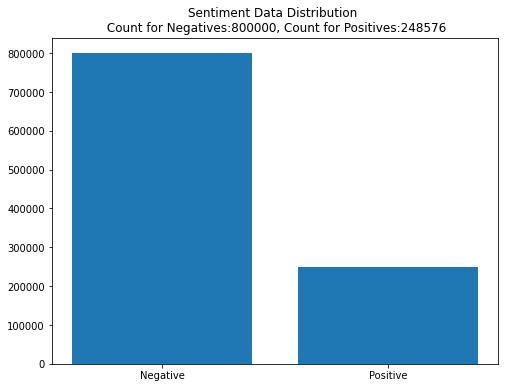

In [6]:
val_count = data.sentiment.value_counts()
plt.figure(figsize=(8,6))
plt.bar(val_count.index, val_count.values)
plt.title('Sentiment Data Distribution \n Count for Negatives:'+str(data.sentiment.value_counts()['Negative'])+', '+
         'Count for Positives:'+str(data.sentiment.value_counts()['Positive']))

In [7]:
import random
random_idx_list = [random.randint(1,len(data.text)) for i in range(10)] # creates random indexes to choose from dataframe
data.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
746419,Negative,went for a ride. couldnt find arlene fuchs katz.
624073,Negative,the 100 degree statesboro weather is causing m...
956384,Positive,Any player of Mafia Wars for iPhone/iPod touch...
629988,Negative,"#EagleCam #1 and #2 appear to be down, no vide..."
2036,Negative,"@hollaglam my fav English teacher, she just ha..."
562066,Negative,"moving out of 440 east 23rd. my, how time flies."
767507,Negative,Just got really sad thinking that this will be...
899998,Positive,"finished the lessons, hooray!"
697208,Negative,@DanaDeadPetals Um I miss you
906474,Positive,@unfolder There's no pause button in the game ...


In [8]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)
data.text = data.text.apply(lambda x: preprocess(x))

In [9]:
data.head(10)

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see
5,Negative,whole crew
6,Negative,need hug
7,Negative,hey long time see yes rains bit bit lol fine t...
8,Negative,nope
9,Negative,que muera


In [10]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1) 
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 838860
Test Data size 209716


In [11]:
train_data.head(10)

,sentiment,text
329191,Negative,gym fucking packed
557768,Negative,im er right w best friend cause decited hit he...
93060,Negative,nope made make tho
558339,Negative,uuuggghhh body hurts especially arms
650854,Negative,hi katie im n 9 yr old daughter love u n upset...
932169,Positive,going watch house
422028,Negative,u think
812644,Positive,editing bathroom series competition
48833,Negative,hate skint sweeps festival motor cross bh week...
728220,Negative,happy fathers day guess love michael kimberly ...


In [12]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 210393


In [13]:
x_train = tf.keras.utils.pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen = 200)
x_test = tf.keras.utils.pad_sequences(tokenizer.texts_to_sequences(test_data.text), maxlen = 200)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (838860, 200)
Testing X Shape: (209716, 200)


In [14]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (838860, 1)
y_test shape: (209716, 1)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           6732576   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 6,749,227
Trainable params: 6,749,227
Non-trainable params: 0
______________________________________________

In [16]:
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
26215/26215 [==============================] - 6935s 264ms/step - loss: 0.3921 - accuracy: 0.8265 - val_loss: 0.3717 - val_accuracy: 0.8358
Epoch 2/2
26215/26215 [==============================] - 5994s 229ms/step - loss: 0.3611 - accuracy: 0.8434 - val_loss: 0.3671 - val_accuracy: 0.8384


In [49]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

21/21 [==============================] - 35s 2s/step


In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(list(test_data.sentiment), y_pred_1d))

Accuracy: 0.8383671250643727


In [58]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = tf.keras.utils.pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label:")
    return ([prediction])
    
def output(result):
    if result==[1]:
        print("Positive")
    else:
        print("Negative")
test_sentence1 = "I enjoyed my journey on this flight."
a=predict_sentiment(test_sentence1)
output(a)
test_sentence2 = "This is the worst flight experience of my life!"
b=predict_sentiment(test_sentence2)
output(b)

1/1 [==============================] - 0s 46ms/step
Predicted label:
Positive
1/1 [==============================] - 0s 53ms/step
Predicted label:
Negative
